<a href="https://colab.research.google.com/github/Settodestridor/IA-aplica-EQ/blob/main/IA_ppgeq_Aula06_model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Seleção e Avaliação de Modelos

Existem diversos modelos disponíveis para realizar tarefas de aprendizagem de máquina, cada um com suas vantagens e desvantagens.

Para otimizar o desempenho para uma dada tarefa, precisamos considerar duas questões:

 1) Qual modelo é mais adequado para a tarefa?

 2) Como configurar um dado modelo de modo a gerar o melhor resultado possível?

Essas duas questões estão relacionadas com os conceitos de *avaliação* e *seleção* de modelos, que podem ser definidas da seguinte forma:

*    **Avaliação de modelos**: Processo de análise do desempenho de um dado modelo em realizar uma dada tarefa (classificação, regressão, etc.), por exemplo, avaliando métricas de desempenho como acurácia, precisão, recall, etc.

*    **Seleção de modelos**: Processo de selecionar um modelo de aprendizagem de máquina entre vários candidatos possíveis. Pode envolver algoritmos com estrutura distinas (por exemplo, classificadores SVM ou Naive-Bayes) ou diferentes configurações de hiperparâmetros em um modelo (por exemplo, formato do kernel em uma SVM).


É importante destacar que estas questões dependem tanto do tipo de tarefa realizado quanto do conjunto de dados!!



Mais detalhes sobre este assunto podem ser encontrados na documentação do sklearn: https://scikit-learn.org/stable/model_selection.html


Obs.: Exemplo de comparação entre diferentes algoritmos de classificação https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#1) Validação Cruzada (*Cross Validation*)

Anteriormente, vimos que uma maneira simples de avaliar a capacidade de generalização do classificador é dividir o conjunto de dados em dois subconjuntos: **Treinamento** e **teste**:

*    Conjunto de treinamento: Usando para obter os parâmetros do modelo, por exemplo, através da miminização do risco empírico;

*    Conjunto de teste: Usando para avaliar o desempenho do algoritmo em dados não usados no treinamento, para evitar sobreajuste.


**Problema**: Podemos definir hiperparâmetros que gerem bom resultados no conjunto de teste, mas isso pode levar a um *sobreajuste nos dados de teste*!!

**Solução**: Criar um terceiro subconjunto de dados (conjunto de validação), permitindo o ajuste dos hiperparâmetros. Após finalizado todo o ajuste, o modelo é então testado usando o conjunto de teste.



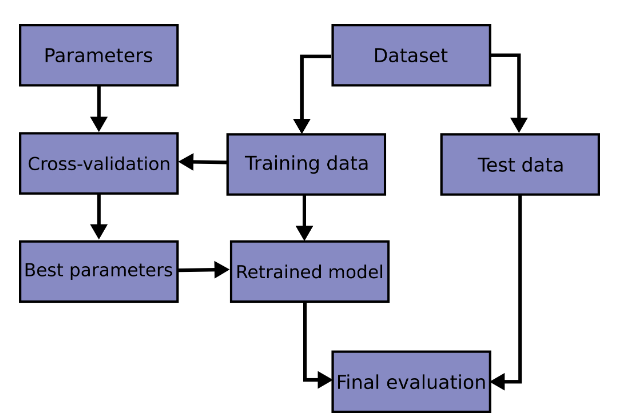

Dividir os dados em 3 subconjuntos pode ser problemático se o dataset não for muito grande. Para contornar isso, podemos usar uma estratégia de **validação cruzada** para criar dois conjutos a partir dos dados de treinamento.

Neste caso, a "estratégia" de análise seria a seguinte:

*    Dividir os dados em *treinamento* e *teste*

*    Aplicar validação cruzada nos dados de treinamento e obter as métricas de desempenho. Por exemplo, se for usada uma abordagem k-fold, vamos obter $k$ valores distintos

*    Determinar a média e desvio padrão das métricas. Fazer o ajuste dos hiperparâmetros para otimizar estes valores

*    Com o modelo e os hiperparâmetros definidos, fazer o treinamento (ajuste dos parâmetros do modelo) utilizando todos os dados do conjunto de treinamento

*    Avaliar as métricas de desempenho *finais* utilizando o conjunto de teste. Estes valores irão indicar se o modelo tem boa capacidade de generalização.





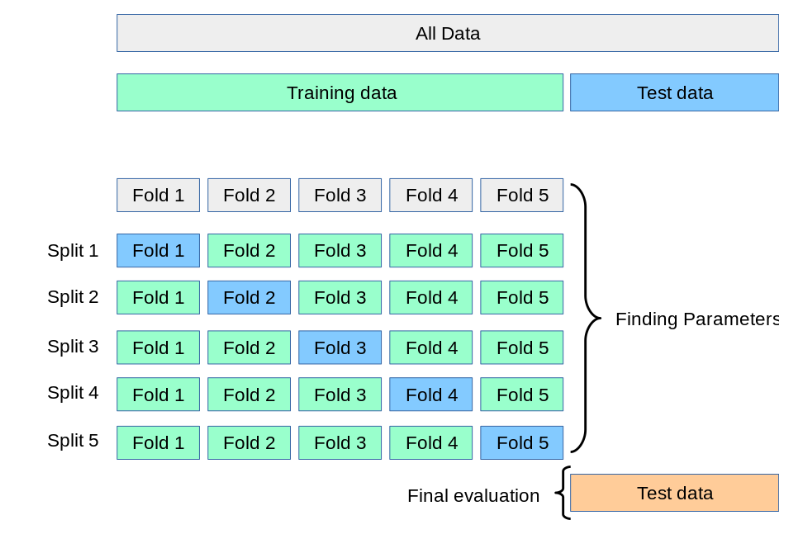

##Validação cruzada utilizando a função cross_val_score

In [ ]:
#importando o conjunto de dados dos cogumenos tóxicos/comestíveis para ilustrar
import pandas as pd #Importando a biblioteca pandas (manipulação de dados)

url = 'https://drive.google.com/uc?id=133OqgqL7kRtBWNP01hzDFD2eRC5abV-H' #link para o arquivo de dados no Google Drive
#Esta é uma versão reduzida do dataset disponível em https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

df = pd.read_csv(url) #Lendo o arquivo com dados e alocando na variável 'df' (DataFrame)

#Armazendo uma matriz X com todos os atributos de entrada
X = df.iloc[:,0:8]

#Armazendo um vetor y com os rótulos de saída
y = df.iloc[:,8]

#Transformando os dados anteriores em variáveis do tipo "array" para permitir manipulação numérica
X_array = X.values
y_array = y.values

#Utilizando a função MinMaxScaler para normalizar os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) #definindo o intervalo entre 0 e 1
X_array_norm = scaler.fit_transform(X_array) #Normalizando os dados da matriz X e alocando em uma nova variável

#Fazendo uma divisão trait/test split 'normal'
from sklearn.model_selection import train_test_split
test_group_size = 0.3 #Fração dos dados no grupo de teste
seed = 667 #número aleatório utilizado como semente para o algoritmo de divisão. Manter esse valor fixo garante que a divisão será sempre igual
X_train, X_test, y_train, y_test = train_test_split(X_array_norm, y_array, test_size=test_group_size, random_state=seed)


In [ ]:
#Função 'básica' de válidação cruzada: cross_val_score. Por padrão, vai calcular a acurácia com uma estratégia k-fold
from sklearn.model_selection import cross_val_score
#Importanto as svm para ilustrar. Pode ser usada a mesma abordagem com qualquer classificador
from sklearn import svm
import numpy as np

#Classificador usando um kernel rbf e definindo um valor para  o parâmetro de regularização
clf_cv = svm.SVC(kernel='rbf', C=1000, gamma = 1, random_state=42)
#avaliando as métricas para cada um dos dez folds
scores = cross_val_score(clf_cv, X_train, y_train, cv=10)
#calculando a média e o desvio padrão
ave_score = np.mean(scores)
std_score = np.std(scores)
print("%0.2f de acurácia média com desvio padrão de %0.2f" % (ave_score, std_score) )
#Obs.: Neste etapa, o objetivo é alterar valores como a função usada no kernel e o valor de C para otimizar o resultado

0.94 de acurácia média com desvio padrão de 0.01


0.94 de acurácia no grupo de teste


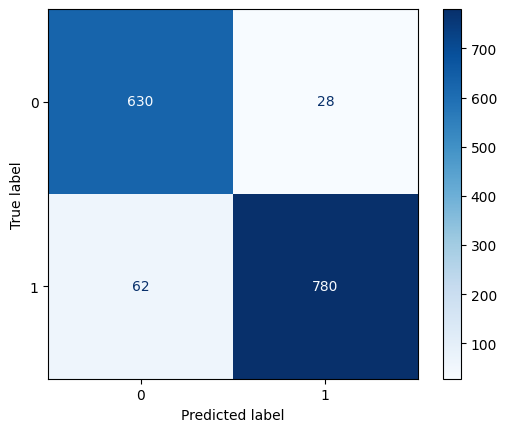

In [ ]:
#Ajuste final - utilizando agora todos os dados do conjunto de treinamento
clf_final = svm.SVC(kernel='rbf', C=1000, gamma = 1, random_state=42)
clf_final.fit(X_train, y_train)
predictions = clf_final.predict(X_test)

#Avaliando algumas métricas de desempenho finais.
#Construindo a matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay #Pacote para visualização da cm

cm = confusion_matrix(y_test, predictions) #matriz gerada com base nos valores reais (y_test) e nos previstos (predictions)
#print(cm)

#plotando a confusion matrix de maneira visualmente mais agradável!
ConfusionMatrixDisplay(cm).plot(cmap='Blues');

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print("%0.2f de acurácia no grupo de teste" % acc )

##Validação cruzada utilizando a cross_validade

Uma função um pouco mais completa para validação cruzada disponível no sklearn é a "cross_validade", que como saída retorna um dicionário com informações como os tempos de ajuste e também permite definir diferentes métricas de análise.

In [ ]:
#Demonstração de uso do cross_validade
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
#Avaliando a precisão e o recall
scoring = ['precision_macro', 'recall_macro']
clf_2 = svm.SVC(kernel='rbf', C=1000, gamma = 1, random_state=0)
scores_cval = cross_validate(clf_2, X_train, y_train, scoring=scoring, cv=10)
print(sorted(scores_cval.keys())) #Valores gerados no dicionário

#Tempo de ajuste e predição médios
print("Tempo médio de ajuste: %0.2f" %np.mean(scores_cval['fit_time']) )
print("Tempo médio de predição: %0.2f" %np.mean(scores_cval['score_time']) )

#Precisão e recall médios
ave_prec = np.mean(scores_cval['test_precision_macro'])
ave_recall = np.mean(scores_cval['test_recall_macro'])
std_prec = np.std(scores_cval['test_precision_macro'])
std_recall = np.std(scores_cval['test_recall_macro'])
print("%0.2f de precisão média com desvio padrão de %0.2f" % (ave_prec, std_prec) )
print("%0.2f de recall médio com desvio padrão de %0.2f" % (ave_recall, std_recall) )



['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
Tempo médio de ajuste: 1.13
Tempo médio de predição: 0.02
0.93 de precisão média com desvio padrão de 0.01
0.94 de recall médio com desvio padrão de 0.01


#2) Ajuste dos Hiperparâmetros

Lembrando:

**Hiperparâmetros**: Parâmetros que não são diretamente obtidos através do conjunto de dados. Exemplo: fatores de regularização, função kernel, número de vizinhos no kNN, etc.

Usualmente, não é viável encontrar os melhores valores para os parâmetros por tentativa e erro, por isso, existem algumas técnicas que podem ser aplicadas.


##2.1) Grid Search (Busca em grade)

O método mais simples para busca de hiperparâmetros adequados é varrer um espaço de busca e avaliar o desempenho do classificador em cada ponto. Essa é a estratégia do método *Grid Search*:

*    Inicialmente, define-se os valores para os parâmetros que deverãos ser testados
*    É aplicada uma estratégia de validação cruzada para **cada combinação** dos parâmetros

*    A combinação que gera o melhor desempenho é escolhida.

**Vantagens**: Fácil de implementar e permite um controle fino dos valores que serão avaliados

**Desvantagens**: Computacionalmente caro, pois não considera uma 'direção' no espaço de busca.



---

A seguir é ilustrada a aplicação para um classificador SVM considerando o seguinte:

i) Duas funções para o kernel: linear e rbf

ii) Para o kernel linear, quatro valores para o parâmetro de regularização: 100, 200, 500 e 2000 (4 testes diferentes)

iii) Para o kernel rbf, quatro valores para os parâmetros de regularização: 100, 200, 500 e 2000, bem como três valores para o parâmetro gamma: 0.1, 1 e 10 (12 testes diferentes)

Assim, no total serão realizados 16 testes distintos.




In [ ]:
from sklearn.model_selection import GridSearchCV
#Importando a função 'time' para medir o tempo gasto
import time

#Definindo o grid dos parâmetros
param_grid = [
  {'C': [1, 100, 500, 1000], 'kernel': ['linear']},
  {'C': [1, 100, 500, 1000], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']},
 ]

svc = svm.SVC() #Importanto o classificador sem definir nenhum parâmetro

#Defininindo o classificador com o grid search
clf_gs = GridSearchCV(svc, param_grid, cv=5);

start_time = time.time() #Iniciando a contagem do tempo
#Ajustando os parâmetros do modelo, para cada combinação
clf_gs.fit(X_train, y_train);
end_time = time.time() #Encerrando a contagem de tempo

#Imprimindos os melhores parâmetros obtidos
print(clf_gs.best_params_)

print('Tempo gasto no ajuste: %0.2f' % (end_time - start_time))

{'C': 100, 'gamma': 10, 'kernel': 'rbf'}
Tempo gasto no ajuste: 37.47


In [ ]:
# Gerando uma tabela com os resultados para cada combinação
results = pd.DataFrame(clf_gs.cv_results_)

# Filtrando as colunas de interesse
results_table = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Exibindo a tabela
print(results_table)

                                        params  mean_test_score  \
0                 {'C': 1, 'kernel': 'linear'}         0.633143   
1               {'C': 100, 'kernel': 'linear'}         0.632000   
2               {'C': 500, 'kernel': 'linear'}         0.632000   
3              {'C': 1000, 'kernel': 'linear'}         0.632857   
4      {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.654286   
5        {'C': 1, 'gamma': 1, 'kernel': 'rbf'}         0.744857   
6       {'C': 1, 'gamma': 10, 'kernel': 'rbf'}         0.943714   
7    {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}         0.707714   
8      {'C': 100, 'gamma': 1, 'kernel': 'rbf'}         0.883429   
9     {'C': 100, 'gamma': 10, 'kernel': 'rbf'}         0.966571   
10   {'C': 500, 'gamma': 0.1, 'kernel': 'rbf'}         0.735143   
11     {'C': 500, 'gamma': 1, 'kernel': 'rbf'}         0.920286   
12    {'C': 500, 'gamma': 10, 'kernel': 'rbf'}         0.961714   
13  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}         0.74514

Para mais detalhes, bem como variações do método de Grid Search, veja https://scikit-learn.org/stable/modules/grid_search.html

##2.2) Busca Bayesiana

https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html

In [ ]:
#!pip install scikit-optimize scikit-learn==0.20.3

#3) Ajuste do limiar de decisão (*decision threshold*)


Anteriormente, vimos que os algoritmos de classificação definem algum critério para diferenciar a classe prevista de acordo com os atributos de entrada. Esse critério pode ser dado em termos de alguma função preditora ou em termos de uma probabilidade.

Por exemplo, no caso das SVM's, definimos duas classe -1 e +1 e um critério de decisão da forma:

- Se $\mathbf{x}_i \cdot \mathbf{w} + b  < 0$, então $y_i = -1$;

- Se $\mathbf{x}_i \cdot \mathbf{w} + b \geq 0$, então $y_i = 1$.

Enquanto que para Naive Bayes calculamos uma probabilidade $P(y_i|\mathbf{x}_i)$. Supondo um exemplo de classificação binária, onde existem somente duas classes 0 e 1, o critério de decisão pode ser expresso como:

- Se $P(y_i=1|\mathbf{x}_i) \leq 0.5$, então $y_i = 0$

- Se $P(y_i=1|\mathbf{x}_i) > 0.5$, então $y_i = 1$


Esses critérios localizam o ponto de separação entre as classes **equidistante** das duas fronteiras, o que é razoável quando se deseja reduzir a *média global* de pontos classificados erroneamente.

Porém, sabemos que em muitos casos os tipos de erros (falsos positivos e falsos negativos) não são equivalentes, devemos focar em minimizar um deles.

Anteriormente, vimos que a taxa destes erros pode ser mensurada através da determinação da precisão e do recall:



**Precisão:** Habilidade do algoritmo não classificar como positivo uma amostra que na verdade é negativa;

Precisão = $\dfrac{[TP]}{[TP] + [FP]}$



**Recall** (revocação ou sensitividade): Habilidade de classificar corretamente uma amostra positiva.

Recall = $\dfrac{[TP]}{[TP] + [FN]}$

Podemos alterar o **limiar de decisão** do modelo de modo a favorecer uma destas quantidades. No limite, podemos forçar uma situação onde $FN=0$ ou $FP = 0$ (definindo, por exemplo, o critério de decisão de um classificador probabilístico como sendo 0 ou 1), porém, isso irá levar a um grande aumento na outra forma de erro.

Para entender como esses dois erros se relacionam, podemos ir gradativamente variando o limiar de decisão e determinando as taxas de acerto/erro para cada classe. O resultado dessa análise pode ser representado na forma gráfica através da construçao da Curva de Característica de Operação do Receptor.

##3.1) Curva de Característica de Operação do Receptor (ROC)

Uma maneira de verificar a capacidade do classificador em diferenciar as classes conforme o limiar de decisão varia é gerar uma curva relacionando a precisão e o recall em função deste limiar.

Porém, é mais comum construir esta curva utilizando os conceitos de *taxa de verdadeiros positivos* (TPR) e *taxa de falso positivo* (FPR):

*   A TPR, também chamada de *sensitividade*, corresponde exatamente ao recall definido anteriormente e pode ser entendida como a capacidade do modelo de identificar corretamente os verdadeiros positivos:

$$
\textrm{TPR} = \dfrac{[TP]}{[TP] + [FN]}
$$


*  A FPR mede a proporção de exemplos negativos que foram incorretamente classificados como positivos pelo modelo. É definida como a fração de falsos positivos entre todos os exemplos que realmente são negativos:

$$
\textrm{FPR} = \dfrac{[FP]}{[FP] + [TN]}
$$

A FPR está diretamente relacionada com outro conceito que é a *taxa de verdadeiros negativo* (TNR, também chamada de *especificidade*), que mede a proporção de exemplos negativos corretamente classificados pelo modelo:

$$
\textrm{TNR} = \dfrac{[TN]}{[TN] + [FP]} = 1 - \textrm{FPR}
$$


A curva relacionando as taxas de falsos positivos com a de verdadeiros positivos é chamada de Curva de Característica de Operação do Receptor (ROC) e é ilustrada abaixo

*  Para um classificador perfeito, a TPR = 1 e a FPR = 0 para qualquer valor do limiar de decisão (ou seja, todas as amostras são sempre classificadas corretamente);

*   Para um classificador totalmente aleatório, onde as amostras são classificadas sem critério de decisão nenhum, podemos esperar que a prababilidade de uma amostra ser classificiada corretamente é igual a de ser classificada de forma errada, logo FPR = TPR. Por exemplo, no extremo onde FPR = TPR = 1, isto implicaria que todas as amostras são classificadas como positivas (assim, $[FN] = [TN] = 0$).;

*   Para um classificador real, espera-se que ele sempre esteja acima da curva FPR = TPR (ou seja, que ele acerte mais do que erre).

Uma maneira de quantificar este comportamento é determinar a área sobre a curva (AUC). Para um classificador perfeito, AUC = 1, enquanto que para um aleatório, AUC = 0.5.



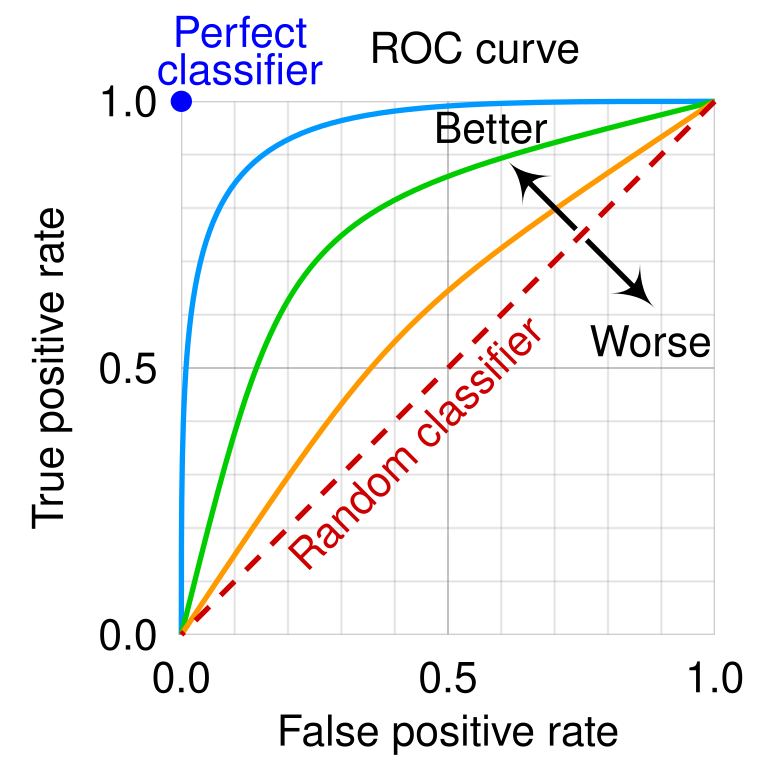

##3.2) Construindo a ROC

O sklearn possui algumas ferramentas implementadas para construção da ROC e cálculo da AUC (ver https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

Um exemplo é demonstrado abaixo usando a função RocCurveDisplay, que já gera o gráfico da ROC.

Observe o seguinte:

*    O treinamento do modelo **não** depende do limiar de decisão, por isso, a ROC é construída após o ajuste dos parâmetros!

*     A função RocCurveDisplay avalia diferentes limiares de decisão e faz as previsões com o conjunto de teste, calculando a TPR e a FPR para cada valor.

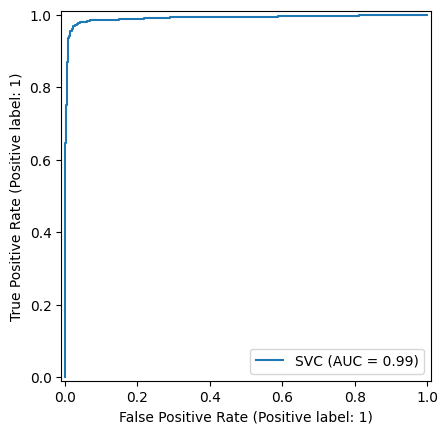

In [ ]:
from sklearn.metrics import RocCurveDisplay

#Usando os melhores valores para os parâmetros determinados anteriormente
clf_optimal = svm.SVC(kernel='rbf', C=100, gamma = 10, random_state=42)
#Ajustando para os dados de treinamento
clf_optimal.fit(X_train, y_train)

#Construindo a ROC
RocCurveDisplay.from_estimator(clf_optimal, X_test, y_test)

##3.3) Alterando o limiar de decisão

Além de construir a ROC, podemos definir manualmente um limiar de decisão diferente do valor padrão para fazer a predição de novos pontos.

No sklearn, a forma como esse limiar é definido (e utilizado) depende do algoritmo aplicado. De modo geral, as classes que definem os modelos podem posusir um dos seguintes métodos (ou ambos):

- predict_proba: Neste caso, o classificador retorna uma probabilidade e não uma classe. Esse valor pode então ser comparado com um limiar de decisão para definir a qual classe o ponto irá pertencer. Por padrão, o limiar é 0.5 e considera-se classes 0 e 1;

- decision_function: Retorna a distância até o hiperplano de separação. Por padrão, o limiar é 0 e considera-se classes -1 e +1. (*Obs*: se necessário, este valor pode ser convertido em uma probabilidade).


Abaixo, é mostrado como ajustar o limiar para uma SVM usando o decision_function.

Primeiro, vamos calcular a precisão e o recall com o limiar de decisão padrão. Na sequência, vamos alterar o limiar e verificar como isso impacta nas métricas.

In [ ]:
#Inicialmente, fazendo as predições usando o classificador otimizado
predictions_final = clf_optimal.predict(X_test)

#Calculando a precisão e o recall para as amostras, para verificar se existe alguma tendência
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
prc = precision_score(y_test, predictions_final)
rec = recall_score(y_test, predictions_final)
print('precision =' ,prc, 'recall = ', rec)

precision = 0.9704840613931524 recall =  0.9762470308788599


In [ ]:
#Agora, alterando o limiar de decisão manualmente

#Obtendo os valores de decisão previstos pelo modelo
decision_scores = clf_optimal.decision_function(X_test)

#Estabelecendo um novo limiar (por padrão, seria 0)
threshold = 0.5

#Prevendo as classes usando este limiar
y_pred_threshold = (decision_scores >= threshold).astype(int)

#Calculando precisão e recall
prc_nt = precision_score(y_test, y_pred_threshold)
rec_nt = recall_score(y_test, y_pred_threshold)
print('precision =' ,prc_nt, 'recall = ', rec_nt)

precision = 0.9887780548628429 recall =  0.9418052256532067


##3.3) ROC para Classificação Multiclasse

Como a ROC é construída usando os conceitos de verdadeiro/falsos positivos, portanto estão diretamente relacionadas com problemas de **classificação binária**, por isso, a função RocCurveDisplay (por exemplo) espera que os rótulos sejam binários.

Quando mais de uma classe está presente precisamos rever estas definições. Em aulas anteriores, vimos que podemos calcular valores com precisão e recall usando alguma estratégia de binarização das classes, sendo as mais usadas as One-vs-rest e one-vs-one:







---


One-vs-rest (OvR): um classificador é treinado para cada classe, tratada como a 'positiva', sendo todas as demais tratadas como 'negativa'. Para ilustrar, suponha um caso com quatro classes: cl1, cl2, cl3 e cl4. As classificações binárias realizada seriam:

Classificação 1: cl1 vs (cl2, cl3 e cl4)

Classificação 2: cl2 vs (cl1, cl3 e cl4)

Classificação 3: cl3 vs (cl1, cl2 e cl4)

Classificação 4: cl4 vs (cl1, cl2 e cl3)



---



One-vs-one (OvO): O conjunto de dados é dividido em subconjuntos contendo amostras de somente duas classes. As métricas são determinada para cada um desses subconjuntos. Supondo o mesmo exemplo anterior, teríamos as seguintes classificações binárias:

Classificação 1: cl1 vs cl2

Classificação 2: cl1 vs cl3

Classificação 3: cl1 vs cl4

Classificação 4: cl2 vs cl3

Classificação 5: cl2 vs cl4

Classificação 6: cl3 vs cl4


---


A seguir será demonstrado como aplicar uma estratégia OvR para um problema multiclasse, sendo esta (usualmente) uma abordagem mais simples.

###3.3.1) ROC usando estratégia OvR

Neste caso, o objetivo é selecionar uma das classes e tratar ela como 'positiva', enquanto todas as demais são tratadas como 'negativas'. Por exemplo, se considerarmos uma dada classe "a" como sendo a positiva, os valores previstos erroneamente seria:

*   Falso Positivo: Valor de uma classe diferente de "a", mas previsto como sendo da classe "a"

*   Falso Negativo: Valor da classe "a" previsto como sendo de outra classe.


Para construir a curva ROC, precisamos primeiramente **binarizar** as classes para poder aplicar os algoritmos, visto que estes só trabalham com 2 classes. Isso pode ser feito usando um procedimento similar ao one-hot-encoding discutido em aulas anteriores.

Vamos ilustrar a construção das curvas para o exemplo de classificação de vinhos em 6 diferentes categorias.

Primeiro, vamos aplicar um algoritmo de classificação padrão para prever a precisão e o recall (médios) para este conjunto de dados.

Para ilustar, vamos considera novamente o conjunto de dados de classificação de vinhos de acordo com atributos físico-químicos.

In [ ]:
#Importanto os dados para classificação
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

#Arquivo com dados
url_multi = 'https://drive.google.com/uc?id=1IzflRz_Jr3GPo7uxt2epwfdg1jzRKKpz' #link para o arquivo de dados no Google Drive
#https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

df_multi = pd.read_csv(url_multi) #Lendo o arquivo com dados e alocando na variável 'df' (DataFrame)

#Armazendo uma matriz X_multi com todos os atributos de entrada
X_multi = df_multi.iloc[:,0:10]

#Armazendo um vetor y_multi com os rótulos de saída
y_multi = df_multi.iloc[:,11]

#Transformando os dados anteriores em variáveis do tipo "array" para permitir manipulação numérica
X_multi_array = X_multi.values
y_multi_array = y_multi.values

#Normalizando os dados
scaler = MinMaxScaler(feature_range = (0,1)) #definindo o intervalo entre 0 e 1
X_multi_array_norm = scaler.fit_transform(X_multi_array) #Usando a mesma escala de 0 a 1 definida previamente

#Dividindo em grupo de teste e treinamento
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi_array_norm, y_multi_array, test_size=0.3, random_state = 11)

#Ajustando o modelo - Exemplo
clf_multi = svm.SVC(kernel='rbf', C = 100, gamma = 2, random_state=42)
clf_multi.fit(X_multi_train, y_multi_train)

#Calculando os valores previstos para o grupo de teste
predictions_multi = clf_multi.predict(X_multi_test)

#Calculando precisão e recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

prc_multi = precision_score(y_multi_test, predictions_multi, average='weighted')
rec_multi = recall_score(y_multi_test, predictions_multi, average='weighted')

print('Precisão média = ',prc_multi, 'Recall médio =',rec_multi)

Precisão média =  0.5993626444796394 Recall médio = 0.6122448979591837


Agora, vamos aplicar uma etapa de binarização das classes, criando 6 novas coluna com valores 0 ou 1, cada coluna representando uma classe.

Neste exemplo em particular, as classes são:
$$
y = [3,4,5,6,7,8]
$$

Cada coluna criada irá representar uma das classes. Por exemplo, para uma amostra que pertença à classe 4, os valores serão:
$$
y_4 = [0,1,0,0,0,0]
$$
visto que a classe 4 está na segunda posição.

Este procedimento pode ser facilmente implementado usando a função 'LabelBinarizer'

In [ ]:
#importando a função LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
import numpy as np

#Checando as classes presntes
unique, count = np.unique(y_multi_test, return_counts=True) #Conferindo as classes presentes
print('Classes presentes:', unique)

#Aplicando o LabelBinarizer
lb = LabelBinarizer().fit(y_multi_train) #ajustando com base nos dados de treinamento
y_lb = lb.transform(y_multi_test) #aplicando a binarização nos dados de teste
print(y_lb)

#Verificando como uma classe específica foi codificada
lb.transform([4]) #Classe 4, por exemplo

Classes presentes: [3 4 5 6 7 8]
[[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 ...
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]]


array([[0, 1, 0, 0, 0, 0]])

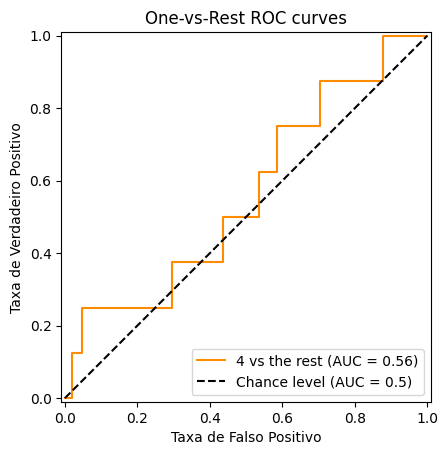

In [ ]:
#Gerando agora a curva ROC
#Escolhendo uma das classes como 'alvo'. Abordagem será esta classe vs as demais.
class_target = 4
class_id = np.flatnonzero(lb.classes_ == class_target)[0] #Determinando a posição associada com a classe alvo

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

#Para gerar a ROC, precisamos dos dados da função de decisão
#Calculando os valores previstos para o grupo de teste
predictions_multi_lb = clf_multi.decision_function(X_multi_test)

#Construindo a curva associada com a classe alvo
display = RocCurveDisplay.from_predictions(
    y_lb[:, class_id],
    predictions_multi_lb[:, class_id],
    name=f"{class_target} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)

#Título dos eixos e do gráfico
_ = display.ax_.set(
    xlabel="Taxa de Falso Positivo",
    ylabel="Taxa de Verdadeiro Positivo",
    title="One-vs-Rest ROC curves",
)

**IMPORTANTE**: Para classificação multiclasse, um classificador onde $FPR = TPR$ **não** corresponde a uma classificador perfeitamente aleatório.

Neste exemplo, como existem 6 diferentes classes, a change de aleatoriamente classificar uma amostra de forma correta é de 1/6 = 16.67%.